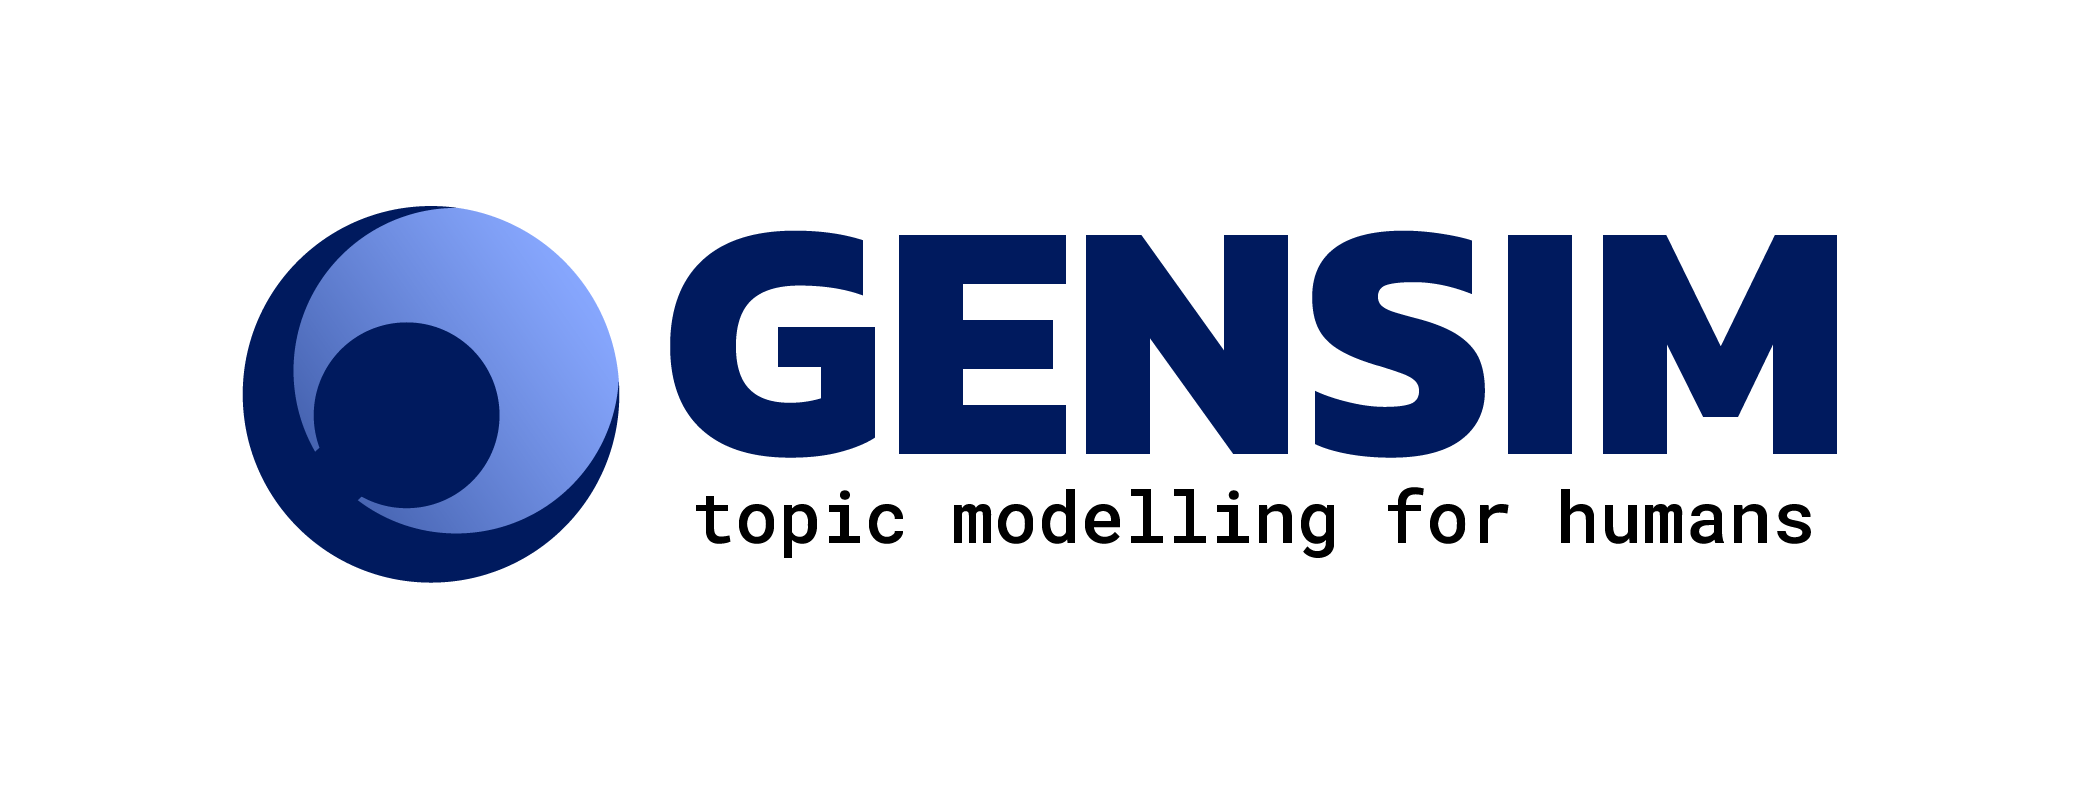

# Word_embedding

## Word2Vec

In [ ]:
# pip install gensim

In [2]:
import numpy as np
from gensim.models import Word2Vec

Gazetelerden alinmis 400 bin satirdan olusan, cleaning islemi tamamlanmis bir datasetimiz var.

Text' i cumlelerden olusan bir liste haline getirmek icin text' i __split__ ile böldük. for dongusu ile ise cumleleri kelimelerine ayirdik ve corpus degiskenine atadik :

In [3]:
text = open('test.txt', 'r', encoding='utf8')       # utf8' mutlaka yaz.  # r=read
text = text.read()
list_sent = text.split('\n')

corpus = []

for sent in list_sent:
    corpus.append(sent.split())                          # split, her bosluktan itibaren ayirma islemi yapar. 

Ilk 1017 karaktere bakarsak, her cumle satirla ayrilmis (\n) :

In [4]:
text

'Vakfiye: Sabık Karaman Beyi Mahmud Beyzade merhum Halil Bey oğlu Alaaddin Bey\'in mahdumu Alaaddin Bey\'in, Niğde\'de tesis etmiş olduğu muazzam medrese ve mescid için, mezkur şehir mülhakatından olup tasarrufunda bulunan karyeleri, mezraları, hamamları,dükkanları, emval ve araziyi vakfedip, medrese müderrisi, hademesi, mescid imam ve müezzini vesaireyi vakıf memur ve müstahdemini vazifelerinin tesviyesinden, vakıf parasının murabahasından artan paranın, Mekke, Medine ve Kudüs ahalisi fukarasına tahsisini şart koştuğuna ve vakıf mütevellisi ile emlak ve akarın tamiri, termimi vesaireye dair.\nŞehabeddin Şah Melek b. Şadi Vakfiyesi: Edirne içinde Yahşi Fakih Hamamı kurbunda birbirine muttasıl üç dükkanı, Edirne dışında Mevlana Cercafi mescidi kurbunda iki dükkanı, başka bir evi, mezkur mescidde her gün imam ve mü\'ezzin tarafından vâkıfın ruhuna birer cüz\' okunması için Edirne içinde Bakırcılar Çarşısı\'nda vaki oniki dükkanı, yine Bakırcılar Hanı kurbunda dört dükkanla üç odayı, Edir

In [5]:
list_sent  

["Vakfiye: Sabık Karaman Beyi Mahmud Beyzade merhum Halil Bey oğlu Alaaddin Bey'in mahdumu Alaaddin Bey'in, Niğde'de tesis etmiş olduğu muazzam medrese ve mescid için, mezkur şehir mülhakatından olup tasarrufunda bulunan karyeleri, mezraları, hamamları,dükkanları, emval ve araziyi vakfedip, medrese müderrisi, hademesi, mescid imam ve müezzini vesaireyi vakıf memur ve müstahdemini vazifelerinin tesviyesinden, vakıf parasının murabahasından artan paranın, Mekke, Medine ve Kudüs ahalisi fukarasına tahsisini şart koştuğuna ve vakıf mütevellisi ile emlak ve akarın tamiri, termimi vesaireye dair.",
 "Şehabeddin Şah Melek b. Şadi Vakfiyesi: Edirne içinde Yahşi Fakih Hamamı kurbunda birbirine muttasıl üç dükkanı, Edirne dışında Mevlana Cercafi mescidi kurbunda iki dükkanı, başka bir evi, mezkur mescidde her gün imam ve mü'ezzin tarafından vâkıfın ruhuna birer cüz' okunması için Edirne içinde Bakırcılar Çarşısı'nda vaki oniki dükkanı, yine Bakırcılar Hanı kurbunda dört dükkanla üç odayı, Edirne

Bolme isleminden sonra artik cumlelerden olusan bir listemiz var :

In [6]:
list_sent[:17]

["Vakfiye: Sabık Karaman Beyi Mahmud Beyzade merhum Halil Bey oğlu Alaaddin Bey'in mahdumu Alaaddin Bey'in, Niğde'de tesis etmiş olduğu muazzam medrese ve mescid için, mezkur şehir mülhakatından olup tasarrufunda bulunan karyeleri, mezraları, hamamları,dükkanları, emval ve araziyi vakfedip, medrese müderrisi, hademesi, mescid imam ve müezzini vesaireyi vakıf memur ve müstahdemini vazifelerinin tesviyesinden, vakıf parasının murabahasından artan paranın, Mekke, Medine ve Kudüs ahalisi fukarasına tahsisini şart koştuğuna ve vakıf mütevellisi ile emlak ve akarın tamiri, termimi vesaireye dair.",
 "Şehabeddin Şah Melek b. Şadi Vakfiyesi: Edirne içinde Yahşi Fakih Hamamı kurbunda birbirine muttasıl üç dükkanı, Edirne dışında Mevlana Cercafi mescidi kurbunda iki dükkanı, başka bir evi, mezkur mescidde her gün imam ve mü'ezzin tarafından vâkıfın ruhuna birer cüz' okunması için Edirne içinde Bakırcılar Çarşısı'nda vaki oniki dükkanı, yine Bakırcılar Hanı kurbunda dört dükkanla üç odayı, Edirne

In [7]:
list_sent[2].split()

['Fazlullah',
 'Paşa',
 'b.',
 'Hacı',
 'İlyas',
 'bin',
 "Akçakoca'nın,",
 'Gebze',
 "(Gekboze)'de",
 'bina',
 'ettiği',
 'tekkenin',
 'masraflarını',
 'karşılamak',
 'için',
 'kendi',
 'mülkü',
 'olan',
 'Çenki',
 "Köyü'nü",
 '(Çengelköyü),',
 'Fendik',
 'köyünü,',
 'haracları,',
 'ispençleri',
 've',
 'bütün',
 'rüsumiyle',
 've',
 'hududları',
 'tarif',
 'edilen',
 'tekke',
 'önündeki',
 'mülk',
 'bağını,',
 'harman',
 've',
 'tekke',
 'tarlası',
 'isimli',
 'tarlalarını,',
 "Hereke'deki",
 'değirmenini',
 've',
 'önündeki',
 'mahzen,',
 'anbar',
 've',
 'iskelesini,',
 "Gebze'deki",
 'dükkanlarını',
 've',
 'sair',
 'bazı',
 'yerlerini,',
 'vakfın',
 'idaresine,',
 'varidatın',
 'suret-i',
 'sarfına',
 've',
 'hayatta',
 'iken',
 'kendi',
 'tasarrufunda',
 'olan',
 'vakfın',
 'vefatından',
 'sonra',
 'kimlere',
 'intikal',
 'edeceğine',
 'dair',
 'vakfiyesi.']

Corpus icindeki her bir cumle liste icinde tokenlerine ayrilmis sekilde :

In [8]:
print(corpus)

[['Vakfiye:', 'Sabık', 'Karaman', 'Beyi', 'Mahmud', 'Beyzade', 'merhum', 'Halil', 'Bey', 'oğlu', 'Alaaddin', "Bey'in", 'mahdumu', 'Alaaddin', "Bey'in,", "Niğde'de", 'tesis', 'etmiş', 'olduğu', 'muazzam', 'medrese', 've', 'mescid', 'için,', 'mezkur', 'şehir', 'mülhakatından', 'olup', 'tasarrufunda', 'bulunan', 'karyeleri,', 'mezraları,', 'hamamları,dükkanları,', 'emval', 've', 'araziyi', 'vakfedip,', 'medrese', 'müderrisi,', 'hademesi,', 'mescid', 'imam', 've', 'müezzini', 'vesaireyi', 'vakıf', 'memur', 've', 'müstahdemini', 'vazifelerinin', 'tesviyesinden,', 'vakıf', 'parasının', 'murabahasından', 'artan', 'paranın,', 'Mekke,', 'Medine', 've', 'Kudüs', 'ahalisi', 'fukarasına', 'tahsisini', 'şart', 'koştuğuna', 've', 'vakıf', 'mütevellisi', 'ile', 'emlak', 've', 'akarın', 'tamiri,', 'termimi', 'vesaireye', 'dair.'], ['Şehabeddin', 'Şah', 'Melek', 'b.', 'Şadi', 'Vakfiyesi:', 'Edirne', 'içinde', 'Yahşi', 'Fakih', 'Hamamı', 'kurbunda', 'birbirine', 'muttasıl', 'üç', 'dükkanı,', 'Edirne', '

In [9]:
from collections import defaultdict

# Frekansları saklamak için bir sözlük oluşturun
word_freq = defaultdict(int)

# Corpus içindeki kelimelerin frekanslarını hesaplayın
for sentence in corpus:
    for word in sentence:
        word_freq[word] += 1

# Frekansları görüntüleme
for word, freq in word_freq.items():
    print(f"{word}: {freq} kez geçiyor")


Vakfiye:: 8 kez geçiyor
Sabık: 5 kez geçiyor
Karaman: 4 kez geçiyor
Beyi: 4 kez geçiyor
Mahmud: 27 kez geçiyor
Beyzade: 1 kez geçiyor
merhum: 33 kez geçiyor
Halil: 8 kez geçiyor
Bey: 58 kez geçiyor
oğlu: 30 kez geçiyor
Alaaddin: 3 kez geçiyor
Bey'in: 29 kez geçiyor
mahdumu: 3 kez geçiyor
Bey'in,: 10 kez geçiyor
Niğde'de: 1 kez geçiyor
tesis: 9 kez geçiyor
etmiş: 6 kez geçiyor
olduğu: 22 kez geçiyor
muazzam: 2 kez geçiyor
medrese: 14 kez geçiyor
ve: 2245 kez geçiyor
mescid: 15 kez geçiyor
için,: 21 kez geçiyor
mezkur: 41 kez geçiyor
şehir: 3 kez geçiyor
mülhakatından: 20 kez geçiyor
olup: 24 kez geçiyor
tasarrufunda: 17 kez geçiyor
bulunan: 118 kez geçiyor
karyeleri,: 2 kez geçiyor
mezraları,: 2 kez geçiyor
hamamları,dükkanları,: 1 kez geçiyor
emval: 9 kez geçiyor
araziyi: 9 kez geçiyor
vakfedip,: 11 kez geçiyor
müderrisi,: 1 kez geçiyor
hademesi,: 2 kez geçiyor
imam: 7 kez geçiyor
müezzini: 2 kez geçiyor
vesaireyi: 2 kez geçiyor
vakıf: 38 kez geçiyor
memur: 18 kez geçiyor
müstahdemini:

In [10]:
from collections import Counter

# Tüm kelimeleri birleştirin
all_words = [word for sentence in corpus for word in sentence]

# Frekansları hesaplayın
word_freq = Counter(all_words)

# Frekansları görüntüleme
for word, freq in word_freq.items():
    print(f"{word}: {freq} kez geçiyor")


Vakfiye:: 8 kez geçiyor
Sabık: 5 kez geçiyor
Karaman: 4 kez geçiyor
Beyi: 4 kez geçiyor
Mahmud: 27 kez geçiyor
Beyzade: 1 kez geçiyor
merhum: 33 kez geçiyor
Halil: 8 kez geçiyor
Bey: 58 kez geçiyor
oğlu: 30 kez geçiyor
Alaaddin: 3 kez geçiyor
Bey'in: 29 kez geçiyor
mahdumu: 3 kez geçiyor
Bey'in,: 10 kez geçiyor
Niğde'de: 1 kez geçiyor
tesis: 9 kez geçiyor
etmiş: 6 kez geçiyor
olduğu: 22 kez geçiyor
muazzam: 2 kez geçiyor
medrese: 14 kez geçiyor
ve: 2245 kez geçiyor
mescid: 15 kez geçiyor
için,: 21 kez geçiyor
mezkur: 41 kez geçiyor
şehir: 3 kez geçiyor
mülhakatından: 20 kez geçiyor
olup: 24 kez geçiyor
tasarrufunda: 17 kez geçiyor
bulunan: 118 kez geçiyor
karyeleri,: 2 kez geçiyor
mezraları,: 2 kez geçiyor
hamamları,dükkanları,: 1 kez geçiyor
emval: 9 kez geçiyor
araziyi: 9 kez geçiyor
vakfedip,: 11 kez geçiyor
müderrisi,: 1 kez geçiyor
hademesi,: 2 kez geçiyor
imam: 7 kez geçiyor
müezzini: 2 kez geçiyor
vesaireyi: 2 kez geçiyor
vakıf: 38 kez geçiyor
memur: 18 kez geçiyor
müstahdemini:

In [11]:
from collections import Counter

# Tüm kelimeleri birleştirin
all_words = [word for sentence in corpus for word in sentence]

# Frekansları hesaplayın
word_freq = Counter(all_words)

# Frekansları büyükten küçüğe sıralama
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

# Sıralanmış frekansları görüntüleme
for word, freq in sorted_word_freq.items():
    print(f"{word}: {freq} kez geçiyor")


ve: 2245 kez geçiyor
defteri:: 514 kez geçiyor
masraf: 332 kez geçiyor
a.g.tt: 309 kez geçiyor
defteri.: 258 kez geçiyor
Sultan: 218 kez geçiyor
ile: 192 kez geçiyor
için: 190 kez geçiyor
inşaatı: 177 kez geçiyor
Süleymaniye: 177 kez geçiyor
Camii: 175 kez geçiyor
acemi: 160 kez geçiyor
aldıkları: 159 kez geçiyor
çalışan: 159 kez geçiyor
marangoz,: 158 kez geçiyor
müfredatlı: 155 kez geçiyor
taşçı,: 154 kez geçiyor
oğlanlarının: 154 kez geçiyor
lağımcı,: 153 kez geçiyor
demirci,: 153 kez geçiyor
İnşaatta: 153 kez geçiyor
işleri: 153 kez geçiyor
yevmiyelerin: 153 kez geçiyor
duvarcı,: 152 kez geçiyor
bıçkıcı,: 152 kez geçiyor
kurşuncu,: 152 kez geçiyor
sırt: 152 kez geçiyor
hammalı,: 152 kez geçiyor
ırgat,: 152 kez geçiyor
sayıları,: 152 kez geçiyor
bir: 137 kez geçiyor
olan: 129 kez geçiyor
edilen: 127 kez geçiyor
Paşa: 122 kez geçiyor
bulunan: 118 kez geçiyor
ait: 110 kez geçiyor
havi: 101 kez geçiyor
verilen: 100 kez geçiyor
Ali: 94 kez geçiyor
vaki: 87 kez geçiyor
Babüssaade: 86 kez

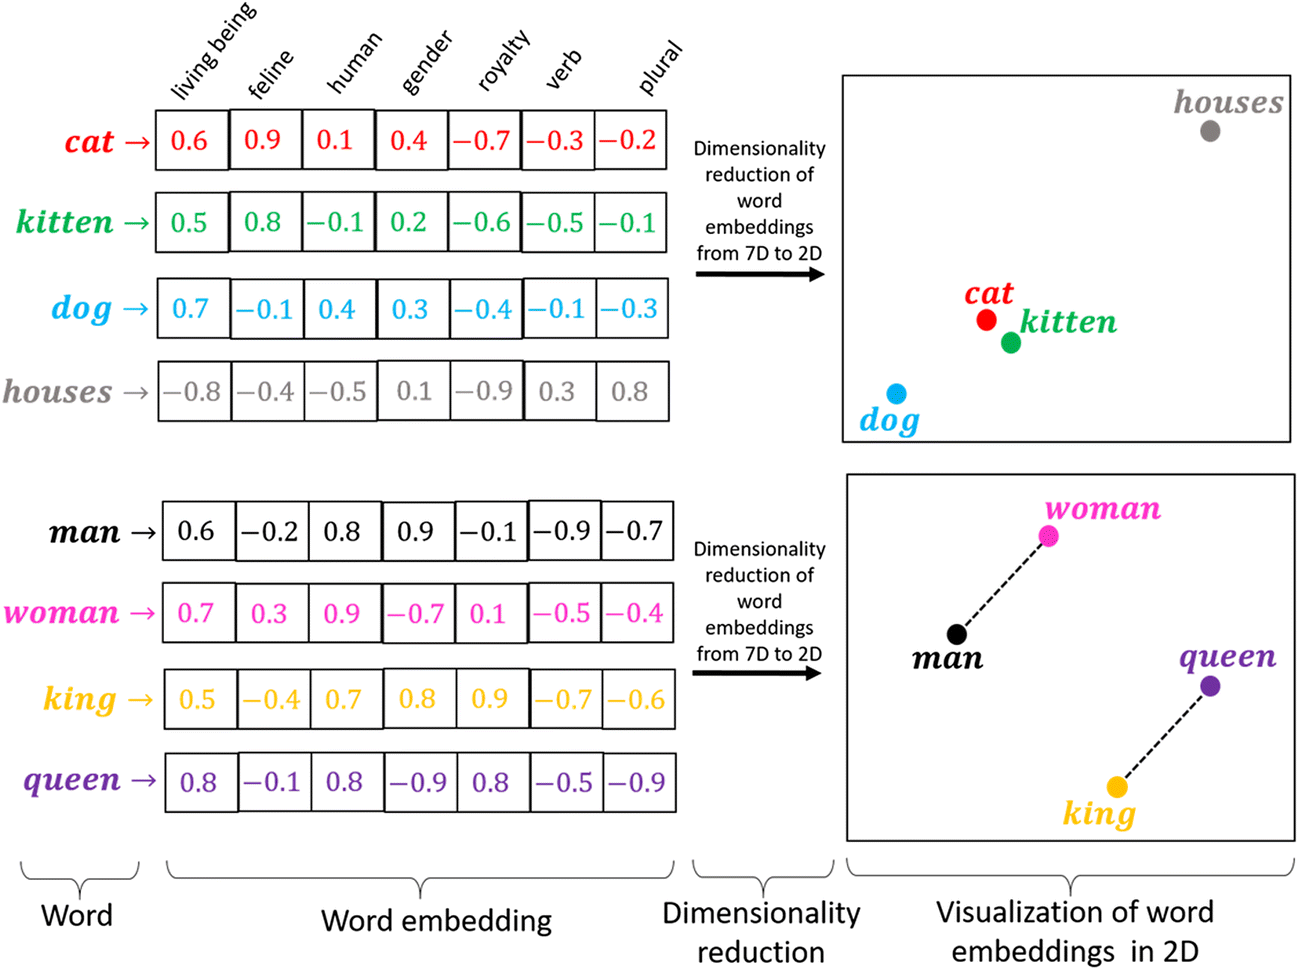

In [12]:
model = Word2Vec(corpus, vector_size= 100, window=5, min_count=5, sg=1)

**vector_size** -->__ Word Embedding boyutu (Feature sayisi). (Best practise olarak 50, 100, 300 sayilari tercih edilir.)

uygulamanıza bağlı olarak, optimum vector_size değeri değişebilir. Örneğin, basit görevler için 50-100 arası bir değer yeterli olabilirken, daha karmaşık doğal dil işleme görevleri için 200-300 veya daha yüksek bir değer tercih edilebilir.

__window (window_size) -->__ Ilgili tokenin saginda ve solunda kacar kelimeye bakarak anlamsal iliskiyi yakalamaya calissin?

__min_count=5 -->__ Corpus' ta 5 ve daha az sayida gecen tokenleri egitime dahil etme.

__sg (Skip-gram) -->__ sg=0 olursa CBOW, sg=1 olursa Skip-gram demek. (Default=0)

Buyuk corpuslarda CBOW , kucuk corpuslarda ise Skip-Gram daha iyi sonuclar verir. Datasetimiz kucuk oldugu icin Skip-Gram' i tercih ettik. 

Yukarida modelimizi kurduk. model Word2Vec (model.wv) icine hangi tokene ait Word2Vec' i gormek istiyorsak onu veriyoruz. 100 boyutlu Word Embedding olusmus (Butun degerler -1 ile 1 arasinda) :

In [13]:
model.wv['Sultan']

array([-0.3901258 , -0.02931002,  0.13852179,  0.15683958, -0.13559003,
       -0.29706255,  0.06419936,  0.43930092, -0.17285633, -0.20668544,
       -0.01648008, -0.14739119, -0.1555845 , -0.16111162, -0.04424216,
       -0.2403028 , -0.15626658, -0.26698813,  0.12338818, -0.16309544,
       -0.12047613, -0.13615774,  0.3043237 , -0.02160657,  0.10653329,
        0.02766668,  0.00255092, -0.16214408, -0.16976078,  0.09117392,
       -0.1732581 ,  0.23840918,  0.26761875, -0.07969891, -0.12149018,
        0.31885505, -0.07634705, -0.41280025, -0.1100223 , -0.29888535,
       -0.09615372, -0.23487063, -0.06221752, -0.2974032 ,  0.20121759,
        0.08126588, -0.16817881,  0.33293492,  0.16915244, -0.00881197,
        0.17095204,  0.07359074,  0.01994999,  0.0435982 , -0.09832828,
       -0.08106484,  0.00732741, -0.0312236 , -0.2872737 , -0.13080844,
        0.1121993 ,  0.22968039, -0.25410733, -0.4747081 , -0.22131327,
       -0.15500546, -0.01555981,  0.21678548, -0.01800044,  0.01

In [14]:
model.wv.similarity('Sultan', 'Paşa')

0.94739735

model.wv.similarity('Sultan', 'Paşa') ifadesi, "Hoca" kelimesi ile "Paşa" kelimesi arasındaki benzerliği ölçmektedir. Dönen değer 0.966635 ise, bu iki kelimenin çok yüksek bir benzerlik derecesine sahip olduğunu göstermektedir.

Yüksek benzerlik değeri, "Sultan" ve "Paşa" kelimelerinin eğitim verisetinde benzer bağlamlarda kullanıldığını ve anlam açısından birbirlerine yakın olduklarını gösterir. Word2Vec modeli, kelime vektörleri arasındaki kozinüs benzerliğini hesaplayarak bu tür ilişkileri tahmin eder. Kozinüs benzerliği değeri 1'e yaklaştıkça iki kelime arasındaki benzerlik artar.

Bu sonuç, "Sultan" ve "Paşa" kelimelerinin benzerliklerini kullanarak ilgili metin analizi veya doğal dil işleme uygulamalarında faydalı olabilir. Örneğin, kelime eşleştirmesi, kelime önerisi veya anlamsal ilişki analizi gibi görevlerde kullanılabilir.

__model.wv.most_similar -->__ Ilgili token ile en cok benzesen 10 kelime geldi. Icindeki __topn=10__ parametresini degistirerek daha farkli sayida token secebiliriz.

sey kelimesinin yerine kullanilabilecek kelimeler ve sey kelimesi ile birlikte en cok kullanilan 'haberim', 'bilgimiz', 'sorunum' kelimeleri sey kelimesine en yakin kelimeleri olarak secilmis :

In [15]:
model.wv.most_similar('Sultan')

[('Kanuni', 0.9933487772941589),
 ("Süleyman'ın", 0.9915144443511963),
 ('zevcesi', 0.9849783182144165),
 ('II.', 0.9740633368492126),
 ("Selim'in", 0.9727979898452759),
 ('validesi', 0.9683446288108826),
 ('Yavuz', 0.9679492115974426),
 ("Bayezid'in", 0.9599981904029846),
 ('Bayezid', 0.9561500549316406),
 ('oğlu', 0.9513872861862183)]

Burada oldugu gibi corpus kucuk oldugu zaman önceki ve sonraki kelimeler ile anlam bütünlükleri kurulur. Buyuk corpuslarda daha fazla anlam butunlukleri kurularak daha yakin anlamli kelimeler tahmin edilebilir. 

In [16]:
model.wv.most_similar('Paşa')

[('İbrahim', 0.9935306310653687),
 ('vakfiyesi:', 0.9916658401489258),
 ('oğlu', 0.9911497235298157),
 ('Mehmed', 0.990256130695343),
 ('Hüseyin', 0.9899635314941406),
 ('kızı', 0.9898565411567688),
 ('Mustafa', 0.9895718693733215),
 ('Vakfiyesi:', 0.9890905618667603),
 ('Ahmed', 0.989022433757782),
 ("Bayezid'in", 0.9868171215057373)]

In [17]:
model.wv.most_similar('Rumeli')

[("Paşa'nın,", 0.9955414533615112),
 ('vasıtasıyla', 0.995538592338562),
 ('Hamza', 0.9954699873924255),
 ('hüccet:', 0.9953808784484863),
 ('Firuz', 0.9953624606132507),
 ("Bey'in,", 0.9952982068061829),
 ('akçeye;', 0.9952585101127625),
 ("Amasya'da", 0.9951978325843811),
 ('Valisi', 0.9951472282409668),
 ('için,', 0.995121419429779)]

In [18]:
model.wv.most_similar('Hacı')

[('b.', 0.995705246925354),
 ('Ahmed', 0.9949479699134827),
 ('Mehmed', 0.9945876002311707),
 ('Bey', 0.9944766759872437),
 ('bin', 0.9934130907058716),
 ('Çelebi', 0.9914137125015259),
 ('oğlu', 0.9912430644035339),
 ('Vakfiyesi:', 0.9911401271820068),
 ('İbrahim', 0.9908793568611145),
 ('vakfiyesi:', 0.9905745983123779)]

Olusturdugumuz modeli kaydettik :

In [19]:
model.save("word2vec")

model.save("word2vec") kodu, bir Word2Vec modelini diske kaydetmek için kullanılır. Word2Vec, kelime gömme (embedding) modelini temsil eder ve eğitilmiş kelime gömme vektörlerini içerir. Bu vektörler, genellikle büyük metin verilerindeki kelimeleri bir sayısal temsil haline getirmek için kullanılır.

model.save("word2vec") koduyla oluşturduğunuz Word2Vec modeli, "word2vec" adlı bir dosya adıyla kaydedilecektir. Bu kaydedilen model dosyasını daha sonra kullanarak, eğitilmiş kelime gömme vektörlerini yeniden yükleme veya başka bir projede kullanma olanağına sahip olursunuz.

Modeli geri cagirmak icin :

In [20]:
model = Word2Vec.load("word2vec")

 kaydettiğiniz Word2Vec modelini notebook'ta kullanabilirsiniz. 

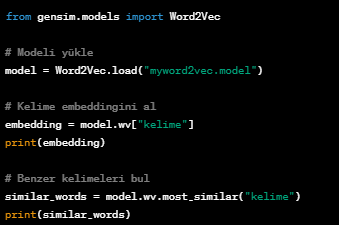

# GloVe

https://nlp.stanford.edu/projects/glove/

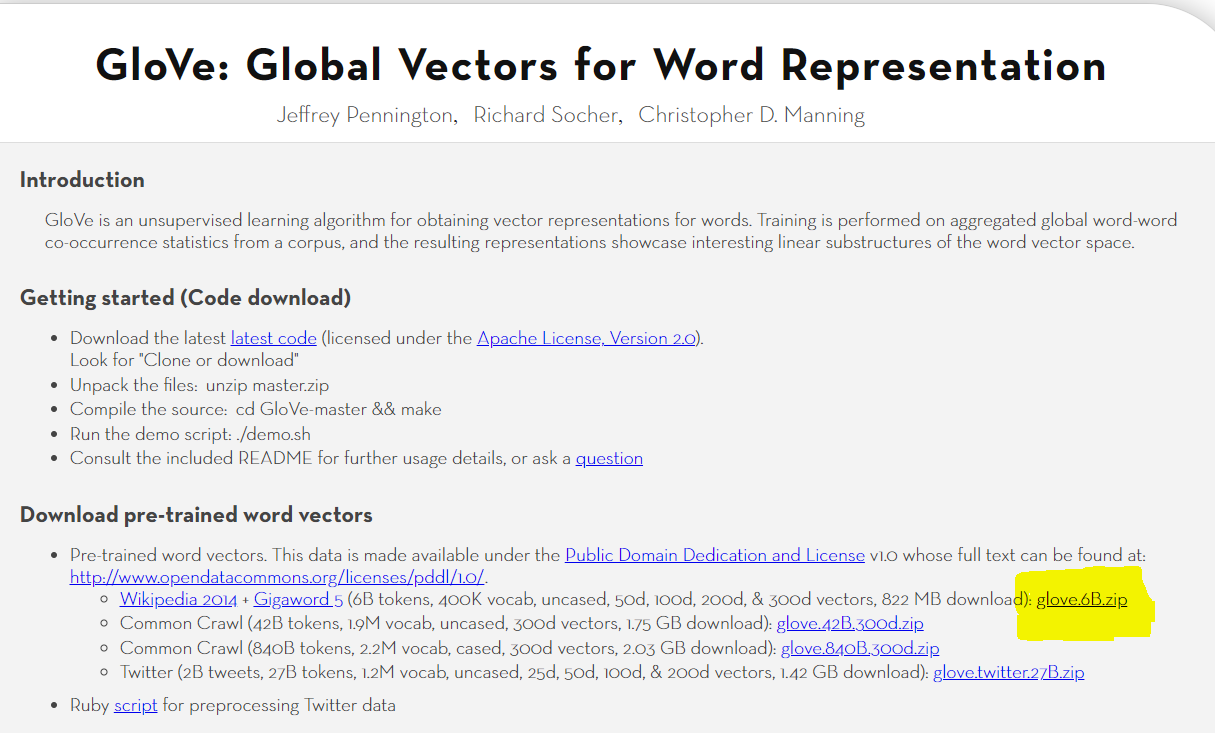

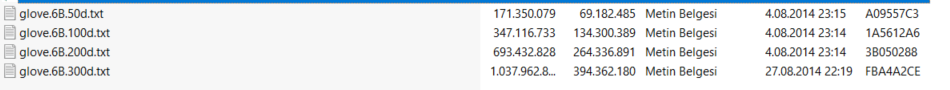

In [21]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors     

Glove modelin direk olarak kullanamiyoruz. Bu yuzden Glove modellerini Word2Vec formatina donusturup o sekilde kullanacagiz.

__KeyedVectors -->__ Glove modeli, Word2Vec formatina donusturup kendi lokalimize kaydettikten sonra lokalden geri cagirmak icin kullandigimiz fonksiyondur. 

Kullanacagimiz corpus, 2014 yilinda wikipedia uzerindeki 6 milyar token ile egitilmis (6B) ve her bir token 100 vektor boyutunda (100d). Egitilmis glove modelimizi internet uzerinden __glove.6B.100d.txt__ ismiyle install ettik ve glove_modeli lokalimize kaydetmek icin bir degiskene istedigimiz isimle atadik. 

In [22]:
glove_model = 'glove.6B.100d.txt'

__glove2word2vec -->__ Glove' dan word2vec' e donusturur ve lokale kaydeder. 

Daha sonra glove modeli __glove2word2vec__  ile word2vec formatina donusturduk. __glove2word2vec__ icine glove_modeli ve lokale kaydettigimiz, donusmesini istedigimiz modelin ismini verdik (glove modeli word2vec'e donusturerek kaydet). Modelimizde 400000 adet kelimeye ait 100 boyutlu vektorler var.

Model daha onceden egitildigi icin her tokene ait Word Embedding' ler sabit. 

In [ ]:
word2vec = 'glove.6B.100d.glove'
glove2word2vec(glove_model, word2vec)

__KeyedVectors__ fonksiyonu ile lokale kaydettigimiz Word2Vec formatindaki modeli cagirdik :

In [23]:
model2 = KeyedVectors.load_word2vec_format(word2vec)

Model daha onceden egitildigi icin alinan sonuclar her zaman aynidir :

In [24]:
model2['king']

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [25]:
model2.most_similar('king')

[('prince', 0.7682328820228577),
 ('queen', 0.7507690787315369),
 ('son', 0.7020887136459351),
 ('brother', 0.6985775828361511),
 ('monarch', 0.6977891325950623),
 ('throne', 0.691999077796936),
 ('kingdom', 0.6811409592628479),
 ('father', 0.680202841758728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074862480164)]

Daha fazla kelime ile egitildigi icin bu modeldeki tahminler Word2Vec modele gore daha iyi :

In [26]:
model2.most_similar('ankara')

[('turkey', 0.7512096762657166),
 ('istanbul', 0.6787630915641785),
 ('turkish', 0.6690374612808228),
 ('damascus', 0.6372509002685547),
 ('tbilisi', 0.6322181820869446),
 ('erdogan', 0.6258038282394409),
 ('moscow', 0.6217040419578552),
 ('brussels', 0.6181437969207764),
 ('skopje', 0.6164302229881287),
 ('cyprus', 0.606403112411499)]

teacher ile sozluksel olarak en fazla iliski instructur arasindadir fakat model kurulurken sozluksel anlama gore degil, kelimelerin birlikte kullanilma sikligina gore kurulur. 

In [27]:
model2.most_similar('teacher')

[('student', 0.8083398938179016),
 ('school', 0.7545565366744995),
 ('teaching', 0.7521439790725708),
 ('taught', 0.741184651851654),
 ('teachers', 0.7291544079780579),
 ('graduate', 0.7134961485862732),
 ('instructor', 0.7077119946479797),
 ('students', 0.6828974485397339),
 ('teaches', 0.6552315354347229),
 ('education', 0.6528990864753723)]

Bu kod, model2 adlı bir Word2Vec modeli üzerinde "teacher" kelimesine en benzer kelimeleri bulmak için kullanılır.

BERT modeldeki sonuclar Word2Vec' e gore cok daha iyi. Cunku 2018' de cikan BERT model, 2018' deki wikipedia ve Toronta' da buluna bir kutuphanedeki 100 milyon kitap ile egitildi. Bu yuzden skorlari cok daha yuksek :

In [28]:
model2.most_similar('doctor')

[('physician', 0.7673239707946777),
 ('nurse', 0.7521507740020752),
 ('dr.', 0.7175194025039673),
 ('doctors', 0.7080886363983154),
 ('patient', 0.7074184417724609),
 ('medical', 0.6995993256568909),
 ('surgeon', 0.6905338764190674),
 ('hospital', 0.6900930404663086),
 ('psychiatrist', 0.658909797668457),
 ('dentist', 0.6447421312332153)]

BERT model ile doctor kelimesinin skorlari :

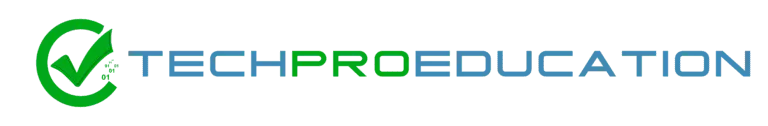